In [3]:
# # !pip install mediapipe
# !pip install gradio --user

  Using cached gradio-3.23.0-py3-none-any.whl (15.8 MB)
  Using cached aiohttp-3.8.4-cp310-cp310-win_amd64.whl (319 kB)
  Using cached httpx-0.23.3-py3-none-any.whl (71 kB)
  Using cached fastapi-0.95.0-py3-none-any.whl (57 kB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached httpcore-0.16.3-py3-none-any.whl (69 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import mediapipe as mp
import numpy as np


In [2]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Awesome Selfie',frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
mp_selfie = mp.solutions.selfie_segmentation

In [4]:
cap = cv2.VideoCapture(0)
#create with statement for mdpipe model
with mp_selfie.SelfieSegmentation(model_selection=0) as model:     
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:  # check if image was read successfully
         break
        frame.flags.writeable =False
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True
        cv2.imshow('Awesome Selfie',frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [3]:
from matplotlib import pyplot as plt
from matplotlib import gridspec


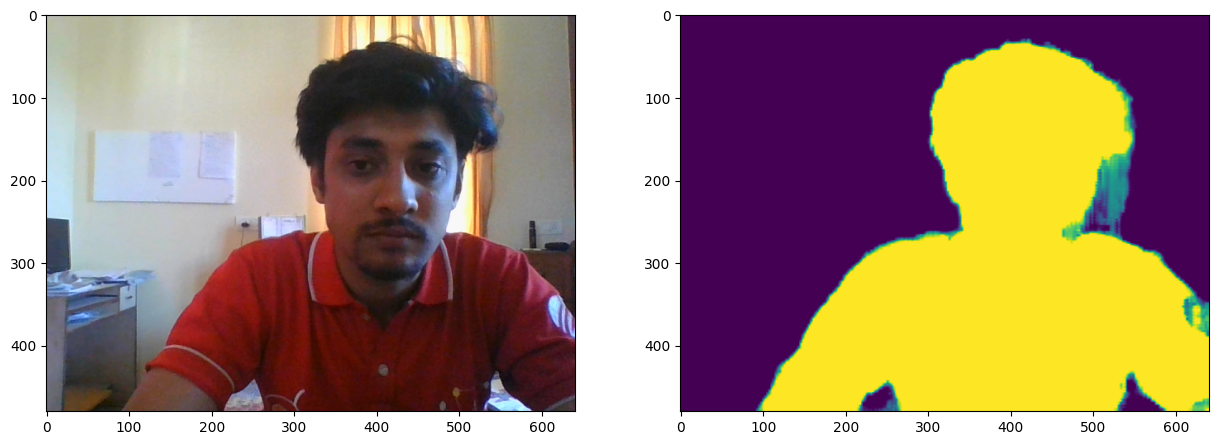

In [6]:
plt.figure(figsize=(15,15))
grid=gridspec.GridSpec(1,2)
ax0=plt.subplot(grid[0])
ax1=plt.subplot(grid[1])
ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

(480, 640)

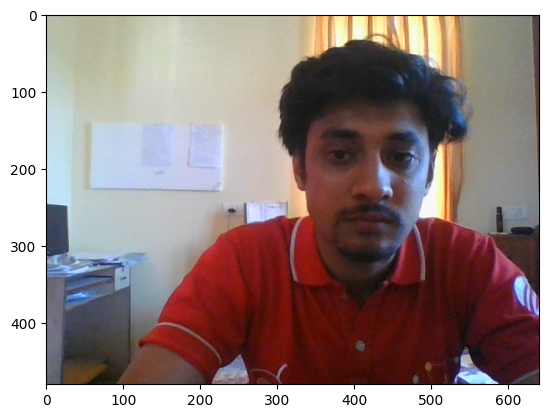

In [7]:
plt.imshow(frame)
res.segmentation_mask.shape

In [8]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3,axis=-1)>0.5
mask

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [9]:
np.stack((res.segmentation_mask,)*3,axis=-1) > 0.5

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [10]:
segmented_image = np.where(mask,frame,background)


In [11]:
segmented_image

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [75, 53, 60],
        [75, 53, 60],
        [78, 55, 63]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [76, 53, 60],
        [77, 52, 60],
        [78, 54, 61]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [76, 53, 60],
        [78, 52, 60],
        [78, 52, 60]]], dtype=uint8)

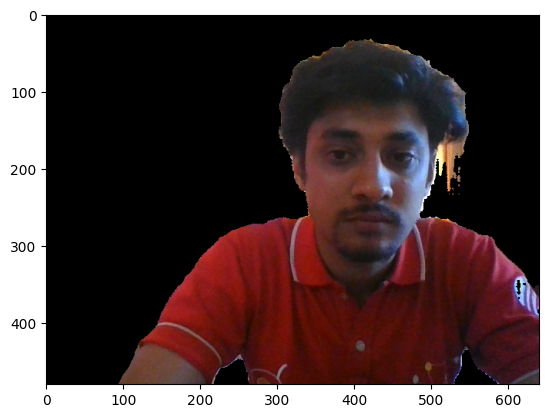

In [12]:
plt.imshow(segmented_image)

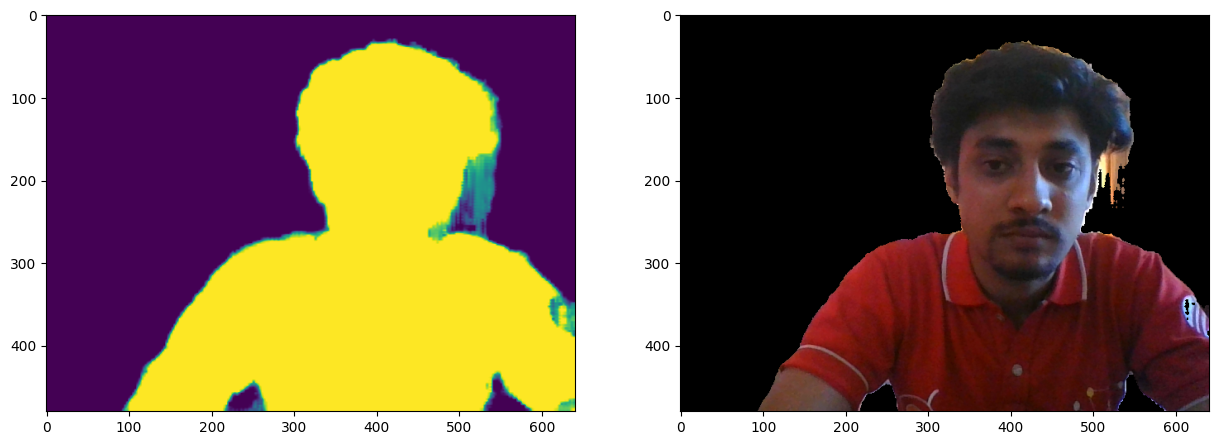

In [13]:
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

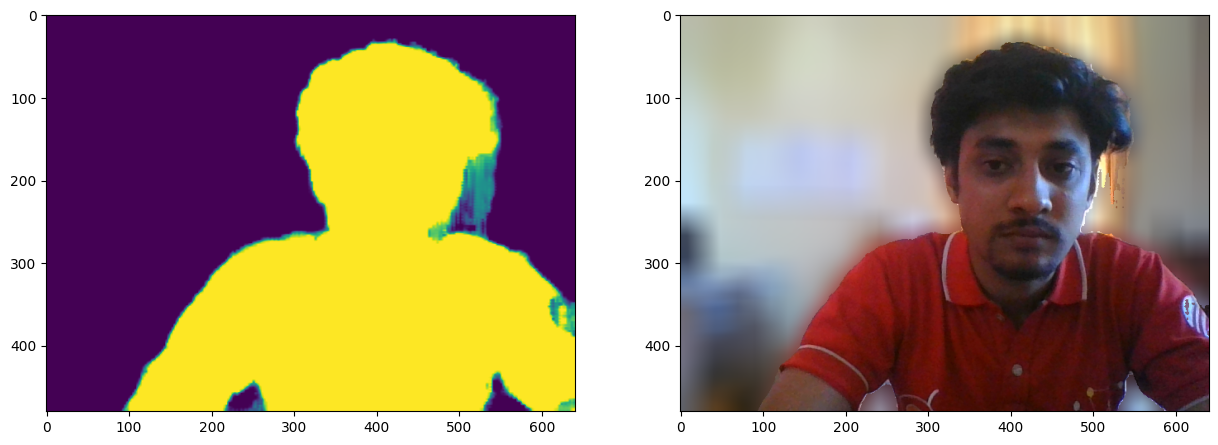

In [14]:
segmented_image = np.where(mask, frame , cv2.blur(frame, (40,40)))
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [5]:
import gradio as gr

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

In [8]:
webcam = gr.inputs.Image(shape=(640, 480), source="webcam")

C:\Users\prans\AppData\Roaming\Python\Python310\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\prans\AppData\Roaming\Python\Python310\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [9]:
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

In [80]:
# webapp = gr.interface.Interface(fn=segment,inputs=webcam,outputs="image")

In [10]:
webapp.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [21]:
webapp.close()

Closing server running on port: 7860
